In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras import regularizers

Loading the dataset, removed all the N/A narratives

In [2]:
complaints = pd.read_csv("complaints.csv")
df = complaints[['Consumer complaint narrative','Product']]
df = df.rename(columns={'Consumer complaint narrative': "narrative"})
df = df[df.narrative.notnull()]

Examining the categories

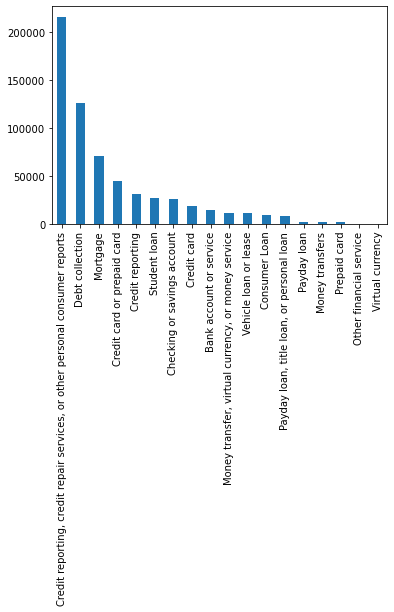

In [3]:
target = df['Product'].value_counts().sort_values(ascending=False)
target.plot.bar()

In [5]:
target.shape

(18,)

In [6]:
target

Credit reporting, credit repair services, or other personal consumer reports    216075
Debt collection                                                                 125610
Mortgage                                                                         70542
Credit card or prepaid card                                                      44636
Credit reporting                                                                 31588
Student loan                                                                     27123
Checking or savings account                                                      26013
Credit card                                                                      18838
Bank account or service                                                          14885
Money transfer, virtual currency, or money service                               11437
Vehicle loan or lease                                                            10857
Consumer Loan                              

In [7]:
df.shape

(620340, 2)

In [8]:
df['Product'][(df['Product']=='Credit reporting, credit repair services, or other personal consumer reports')].count()/df.shape[0]

0.3483170519392591

Creating a new feature, the count of words for every instances, and then examine it

In [9]:
df['word_count'] = df['narrative'].str.split().str.len()

In [10]:
df['word_count'].idxmin()

573

In [11]:
df['word_count'].min()

1

In [12]:
df['word_count'].idxmax()

604188

In [13]:
df['word_count'].max()

6314

In [14]:
df.loc[573]

narrative     Wasapprovedfortrialmodificationwithmymortgages...
Product                                                Mortgage
word_count                                                    1
Name: 573, dtype: object

In [15]:
df['word_count'].mean()

193.57352097236998

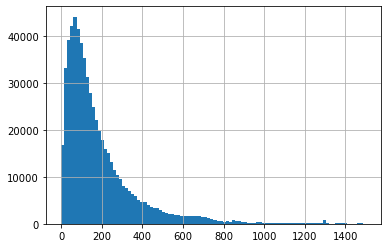

In [16]:
df['word_count'].hist(bins = 100, range=[0,1500])

In [17]:
len(df[df['word_count'] == 10])

1504

In [18]:
one_word = df[df['word_count']==1]

In [19]:
one_word

,narrative,Product,word_count
573,Wasapprovedfortrialmodificationwithmymortgages...,Mortgage,1
14838,Throughoutthelastfewmonthswehavehadawebsite(XX...,"Money transfer, virtual currency, or money ser...",1
22007,"Ihavesent3disputeletterstobothXXXXXXXX,XXXX,Ca...","Credit reporting, credit repair services, or o...",1
26255,Ireceivedacopyofmycreditreportandthereareitems...,"Credit reporting, credit repair services, or o...",1
28204,IamtryingtodoaabalancetransferfromCapitalOneto...,Credit card or prepaid card,1
...,...,...,...
1148713,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"Credit reporting, credit repair services, or o...",1
1160380,Iambeingsuedbytransworldsystemswhohaspartnered...,Debt collection,1
1166164,Ireceivedanegativeremarkonmycreditreport;Theac...,Debt collection,1
1419172,OcwenLetterXXXX.pdf,Mortgage,1


In [20]:
two_words = df[df['word_count']==2]

In [21]:
two_words

,narrative,Product,word_count
5260,inaccurate information,"Credit reporting, credit repair services, or o...",2
6107,Unauthorized inquiry,"Credit reporting, credit repair services, or o...",2
7335,Identity theft.,"Credit reporting, credit repair services, or o...",2
18740,Unauthorized Inquiry,"Credit reporting, credit repair services, or o...",2
19169,Unauthorized inquiry,"Credit reporting, credit repair services, or o...",2
...,...,...,...
1717901,Identity theft.,"Credit reporting, credit repair services, or o...",2
1732678,Fraudulent Inquiries.,"Credit reporting, credit repair services, or o...",2
1739066,Incorrect information,"Credit reporting, credit repair services, or o...",2
1807752,INACCURATE INFORMATION,"Credit reporting, credit repair services, or o...",2


In [22]:
three_words = df[df['word_count']==3]

In [23]:
three_words

,narrative,Product,word_count
5033,InFebrurary2019IwaslookingtopurchaseatruckandI...,"Credit reporting, credit repair services, or o...",3
7788,Fraud alert removal,"Credit reporting, credit repair services, or o...",3
9647,Fraud alert removal,"Credit reporting, credit repair services, or o...",3
24015,"AccordingtotheFairCreditReportingAct,Section60...","Credit reporting, credit repair services, or o...",3
29178,SENT FTC VIOLATION,"Credit reporting, credit repair services, or o...",3
...,...,...,...
1749180,XX/XX/2017 UNKNOWN INQUIRY,"Credit reporting, credit repair services, or o...",3
1769285,Account is fraud,"Credit reporting, credit repair services, or o...",3
1772964,XXXX Debt. Fraudulent,Student loan,3
1798402,Harassing my siblings.,Debt collection,3


In [24]:
four_words = df[df['word_count']==4]

In [25]:
four_words

,narrative,Product,word_count
5040,inaccurate information being reported,"Credit reporting, credit repair services, or o...",4
15861,My complaint was denied,Credit card or prepaid card,4
23025,REPORTING INACCURATE PERSONAL IDENTIFIERS,"Credit reporting, credit repair services, or o...",4
23434,My information is bad,"Credit reporting, credit repair services, or o...",4
24398,ftc violation acol stystems,"Credit reporting, credit repair services, or o...",4
...,...,...,...
1808935,Credit pull. Hard inquiry,"Credit reporting, credit repair services, or o...",4
1810525,"Inaccurate Information, not mine","Credit reporting, credit repair services, or o...",4
1810712,Alot of unknown inquiries,"Credit reporting, credit repair services, or o...",4
1811899,Account is not mine,Debt collection,4


In [26]:
ten_words = df[df['word_count']==10]

In [27]:
ten_words

,narrative,Product,word_count
16,i am a victim of identity theft as previously ...,"Credit reporting, credit repair services, or o...",10
1246,Would like my fraud alerts removed from my cre...,"Credit reporting, credit repair services, or o...",10
7631,Due to overwhelmed hardship I can't pay what i...,Debt collection,10
8836,XX/XX/19 Never authorized an inquiry for credi...,"Credit reporting, credit repair services, or o...",10
13263,Experian is not giving me access to my credit ...,"Credit reporting, credit repair services, or o...",10
...,...,...,...
1811154,"inaccurate information, no knowledge of accoun...","Credit reporting, credit repair services, or o...",10
1811298,You have the wrong person- I am not that person,"Credit reporting, credit repair services, or o...",10
1817183,Information incorrect and l not owe any money ...,"Credit reporting, credit repair services, or o...",10
1817814,Chase bank usa nia XX/XX/2018 unknown inquirin...,"Credit reporting, credit repair services, or o...",10


Decided to remove all of observations that has less than 9 words for their narrative

In [28]:
df = (df[df['word_count'] >= 10])

In [29]:
df

,narrative,Product,word_count
1,transworld systems inc. \nis trying to collect...,Debt collection,18
3,"Over the past 2 weeks, I have been receiving e...",Debt collection,78
6,Pioneer has committed several federal violatio...,Debt collection,152
8,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...","Credit reporting, credit repair services, or o...",171
9,Hello This complaint is against the three cred...,"Credit reporting, credit repair services, or o...",428
...,...,...,...
1823677,"I made a purchase of {$500.00} on XXXX XXXX, 2...",Credit card,44
1823678,Received statements showing {$3000.00} in Savi...,Bank account or service,20
1823680,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",Mortgage,331
1823681,I can not get from chase who services my mortg...,Mortgage,21


In [30]:
lots_of_words = (df[df['word_count'] >= 1000])

In [31]:
lots_of_words

,narrative,Product,word_count
51,We have already tried to contact the company w...,Mortgage,3755
80,Accounts added and/or created unbeknownst to m...,"Credit reporting, credit repair services, or o...",1291
92,I received an email from a XXXX XXXX along wit...,Debt collection,1551
182,Accounts added and/or created unbeknownst to m...,"Credit reporting, credit repair services, or o...",1291
202,"On XX/XX/2019, I received the letter from Bila...",Debt collection,1050
...,...,...,...
1823358,On XX/XX/18 my husband and I contacted Carmax ...,Vehicle loan or lease,1031
1823431,"XXXX XXXX XXXX XXXX XXXX, NY XXXX loan # XXXX ...",Mortgage,1107
1823626,I closed on my home in XXXX with Homebridge Fi...,Mortgage,1869
1823631,"This is a complaint against One West Bank , In...",Mortgage,1081


Creating new labels, the decision based on the CFPB report and original label from the dataset

In [32]:
df.loc[(df['Product'] == 'Credit reporting') | 
       (df['Product']=='Credit reporting, credit repair services, or other personal consumer reports'), 
       'Product'] = 'Credit or consumer reporting, credit repair services'

df.loc[(df['Product'] == 'Credit card') | 
       (df['Product']=='Credit card or prepaid card') |
       (df['Product'] == 'Prepaid card'), 
       'Product'] = 'Credit card or prepaid card'

df.loc[(df['Product'] == 'Money transfer, virtual currency, or money service') | 
       (df['Product']=='Money transfers') |
       (df['Product'] == 'Virtual currency'), 
       'Product'] = 'Money transfer or service, virtual currency'

df.loc[(df['Product'] == 'Payday loan') | 
       (df['Product']=='Payday loan, title loan, or personal loan') |
       (df['Product'] == 'Consumer Loan'), 
       'Product'] = 'Personal loan'

df.loc[(df['Product'] == 'Bank account or service') | 
       (df['Product']=='Other financial service'), 
       'Product'] = 'Other financial service'

removing 'Other financial service' category

In [33]:
df = (df[df['Product'] != 'Other financial service'])

Now I have 9 categories

In [34]:
new_target = df['Product'].value_counts().sort_values(ascending=False)
new_target

Credit or consumer reporting, credit repair services    242435
Debt collection                                         124416
Mortgage                                                 70419
Credit card or prepaid card                              64706
Student loan                                             27033
Checking or savings account                              25860
Personal loan                                            19365
Money transfer or service, virtual currency              12816
Vehicle loan or lease                                    10824
Name: Product, dtype: int64

In [35]:
df.shape

(597874, 3)

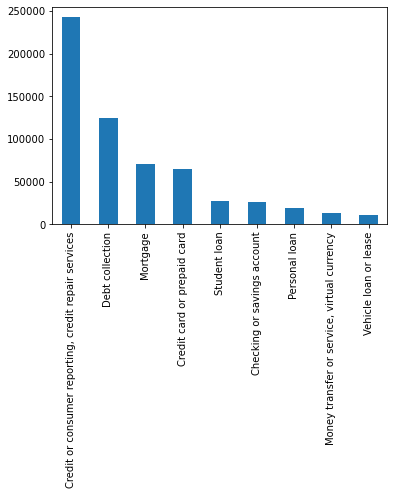

In [36]:
new_target.plot.bar()

In [37]:
df

,narrative,Product,word_count
1,transworld systems inc. \nis trying to collect...,Debt collection,18
3,"Over the past 2 weeks, I have been receiving e...",Debt collection,78
6,Pioneer has committed several federal violatio...,Debt collection,152
8,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...","Credit or consumer reporting, credit repair se...",171
9,Hello This complaint is against the three cred...,"Credit or consumer reporting, credit repair se...",428
...,...,...,...
1823676,1 : Mailing Address is incorrect. \n2 : Date o...,Personal loan,19
1823677,"I made a purchase of {$500.00} on XXXX XXXX, 2...",Credit card or prepaid card,44
1823680,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",Mortgage,331
1823681,I can not get from chase who services my mortg...,Mortgage,21


In [69]:
import re
import string
from nltk.corpus import stopwords

def text_cleaning(text):
    #STOPWORDS = set(stopwords.words('english'))
    '''Turn the text into all lowercase, remove brackets, 
    punctuation, and numbers, and removing stopwords'''
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]', '', text)
    text = re.sub('[^0-9a-z #+_]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.replace('x', '')
    #combine_whitespace = re.compile(r"\s+")
    #text = combine_whitespace.sub(" ", text).strip()
    text = ' '.join(text.split())


    #text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    return text

In [41]:
"""
def text_cleaning(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))

    text = text.lower() # lowercase text
    # replace REPLACE_BY_SPACE_RE symbols by space in text. 
    # substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    # remove symbols which are in BAD_SYMBOLS_RE from text. 
    # substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = text.str.replace('\d+', '')
    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    return text
    
"""

In [39]:
df['text_cleaned'] = df['narrative'].apply(text_cleaning)

<ipython-input-39-22cf9702b9f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_cleaned'] = df['narrative'].apply(text_cleaning)


In [71]:
df['keep_stopwords'] = df['narrative'].apply(text_cleaning)

<ipython-input-71-83b159aefbab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keep_stopwords'] = df['narrative'].apply(text_cleaning)


In [44]:
print(df.iloc[89239]['narrative'])
print()
print(df.iloc[89239]['text_cleaned'])

On XX/XX/2019 Accurate Background e-mailed me a Background report. The report was inaccurate, specially it listed a misdemeanor charge XXXX XXXX XXXX that does no belong to me. As of today, I have not received a correction to this report.

accurate background emailed background report report inaccurate specially listed misdemeanor charge belong today received correction report


In [54]:
print(df.loc[1]['narrative'])
print()
print(df.loc[1]['text_cleaned'])

transworld systems inc. 
is trying to collect a debt that is not mine, not owed and is inaccurate.

transworld systems inc trying collect debt mine owed inaccurate


In [72]:
print(df.iloc[464390]['narrative'])
print()
print(df.iloc[464390]['text_cleaned'])
print()
print(df.iloc[464390]['keep_stopwords'])

I submitted multiple disputes with Experian regarding acct identifier : XXXX. This acct was closed in XXXX and was Paid in Full on XXXX. With every dispute the status of the acct got worse culminating in XXXX when this fully paid and closed acct showed up with an Open - Collection status which caused me to be denied for credit by XXXX ( inquiry on XXXX XXXX, XXXX ) due to " recent or current delinquency ''. Experian finally corrected the status of the acct to Paid, Closed but NOT the Payment History where it shows a " C '' mark for XXXX meaning the account is still in collection. This is contrary to the acct status of paid, closed. I called XXXX XXXX who insisted they report correctly. As it stands now, I ca n't even file an online dispute with Experian. I do n't know the reason and it is not stated when they reject me from filing a dispute. I also called Experian who blamed it on XXXX. I filed XXXX complaint XXXX against XXXX XXXX who responded on XXXX XXXX XXXX with a letter ( attach

In [73]:
df['new_word_count'] = df['text_cleaned'].str.split().str.len()

<ipython-input-73-bce12c572173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_word_count'] = df['text_cleaned'].str.split().str.len()


In [74]:
df

,narrative,Product,word_count,text_cleaned,new_word_count,keep_stopwords
1,transworld systems inc. \nis trying to collect...,Debt collection,18,transworld systems inc trying collect debt min...,9,transworld systems inc is trying to collect a ...
3,"Over the past 2 weeks, I have been receiving e...",Debt collection,78,past weeks receiving ecessive amounts telephon...,29,over the past weeks i have been receiving eces...
6,Pioneer has committed several federal violatio...,Debt collection,152,pioneer committed several federal violations p...,69,pioneer has committed several federal violatio...
8,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...","Credit or consumer reporting, credit repair se...",171,previously requested eperian send copy verifia...,74,previously on and i requested that eperian sen...
9,Hello This complaint is against the three cred...,"Credit or consumer reporting, credit repair se...",428,hello complaint three credit reporting compani...,172,hello this complaint is against the three cred...
...,...,...,...,...,...,...
1823676,1 : Mailing Address is incorrect. \n2 : Date o...,Personal loan,19,mailing address incorrect date birth incorrect...,8,mailing address is incorrect date of birth is ...
1823677,"I made a purchase of {$500.00} on XXXX XXXX, 2...",Credit card or prepaid card,44,made purchase using discover card discover run...,19,i made a purchase of on using my discover it c...
1823680,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",Mortgage,331,contacted branch manager # gateway funding lea...,123,on i contacted who is a branch manager # with ...
1823681,I can not get from chase who services my mortg...,Mortgage,21,get chase services mortgage owns original loan...,9,i can not get from chase who services my mortg...


In [76]:
df.to_csv(r'new_complaints.csv', index = False)

In [58]:
#splitting the data into feature and label
X_data = df['keep_stopwords']
y_data = df['Product']

In [59]:
X = X_data.values
y = y_data.values

In [117]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666, stratify=y)

In [56]:
from sklearn.preprocessing import LabelBinarizer

In [57]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val   = lb.transform(y_val)

In [121]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [11]:
#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(X_train))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(X_train) 
x_val_seq = tokenizer.texts_to_sequences(X_val)

#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=150)
x_val_seq = pad_sequences(x_val_seq, maxlen=150)

In [12]:
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

129218


In [17]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.300d.txt',  encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [18]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((size_of_vocabulary, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [22]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

In [45]:
model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,300,weights=[embedding_matrix],input_length=150,trainable=False)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu')) 
model.add(Dense(18,activation='softmax')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc']) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 150, 300)          38765400  
_________________________________________________________________
lstm_5 (LSTM)                (None, 150, 128)          219648    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 18)                1170      
Total params: 38,994,474
Trainable params: 229,074
Non-trainable params: 38,765,400
_________________________________________________________________
None


In [46]:
history = model.fit(np.array(x_tr_seq),np.array(y_train),batch_size=1025,epochs=10,
                    validation_data=(np.array(x_val_seq),np.array(y_val)))

Epoch 1/10
463/463 [==============================] - 1629s 4s/step - loss: 1.1598 - acc: 0.6308 - val_loss: 0.8834 - val_acc: 0.7071
Epoch 2/10
463/463 [==============================] - 1672s 4s/step - loss: 0.8426 - acc: 0.7196 - val_loss: 0.7996 - val_acc: 0.7328
Epoch 3/10
463/463 [==============================] - 1742s 4s/step - loss: 0.7789 - acc: 0.7392 - val_loss: 0.7582 - val_acc: 0.7466
Epoch 4/10
463/463 [==============================] - 1702s 4s/step - loss: 0.7452 - acc: 0.7502 - val_loss: 0.7314 - val_acc: 0.7556
Epoch 5/10
463/463 [==============================] - 1755s 4s/step - loss: 0.7218 - acc: 0.7575 - val_loss: 0.7188 - val_acc: 0.7590
Epoch 6/10
463/463 [==============================] - 1727s 4s/step - loss: 0.7060 - acc: 0.7624 - val_loss: 0.7084 - val_acc: 0.7630
Epoch 7/10
463/463 [==============================] - 1737s 4s/step - loss: 0.6911 - acc: 0.7671 - val_loss: 0.7026 - val_acc: 0.7652
Epoch 8/10
463/463 [==============================] - 1718s 4s

In [84]:
#load the dataset(X_data) and the label (y_data) 
X_data = df['keep_stopwords']
y_data = df['Product']

In [85]:
X = X_data.values
y = y_data.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666, stratify=y)

In [88]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val   = lb.transform(y_val)

In [87]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X_train)

CountVectorizer(lowercase=False, min_df=0)

In [89]:
X_train

array(['i received a letter and multiple collection agency calls from a company who listed themselves as indicating website contact as this letter was a response by a company listed as this company listed as as indicated above contacted me multiple times over the phone pushing me to consolidate my defaulted student loans i informed the representatives over the phone repeatedly after the first calls that i was never in default and never have defaulted on my student loans and that pushing me to consolidate was illegal practice to get me to pay collection and interest fees i do not owe the initial representative continued to push escalating her tone of voice claiming was hired by the department of education and this to consolidate and work with was my only way out of this situation and that documents could be immediately emailed to me and i should just sign the contracts and provide my bank account information so that small payments could be made if they found i qualified for a rehabilita

In [90]:
X_train = vectorizer.transform(X_train)
X_val  = vectorizer.transform(X_val)

In [63]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(9, activation='softmax', kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_uniform'))
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               20261248  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 99        
Total params: 20,270,253
Trainable params: 20,270,253
Non-trainable params: 0
____________________________________________

In [91]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(9, activation='softmax'))
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                11399040  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 99        
Total params: 11,399,789
Trainable params: 11,399,789
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=1025)

Epoch 1/5
467/467 [==============================] - 52s 112ms/step - loss: 0.7850 - acc: 0.7888 - val_loss: 0.5569 - val_acc: 0.8323
Epoch 2/5
467/467 [==============================] - 51s 109ms/step - loss: 0.4727 - acc: 0.8512 - val_loss: 0.4805 - val_acc: 0.8441
Epoch 3/5
467/467 [==============================] - 50s 108ms/step - loss: 0.3725 - acc: 0.8761 - val_loss: 0.4638 - val_acc: 0.8495
Epoch 4/5
467/467 [==============================] - 51s 110ms/step - loss: 0.3126 - acc: 0.8942 - val_loss: 0.4690 - val_acc: 0.8490
Epoch 5/5
467/467 [==============================] - 52s 110ms/step - loss: 0.2678 - acc: 0.9091 - val_loss: 0.4840 - val_acc: 0.8495


In [93]:
pred_model = np.argmax(model.predict(X_val), axis=-1)
print("Accuracy %s" % accuracy_score(pred_model, np.argmax(y_val, axis=-1)))
print(classification_report(np.argmax(y_val, axis=-1),pred_model))

Accuracy 0.8494919506585825
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      5172
           1       0.83      0.78      0.80     12941
           2       0.87      0.92      0.90     48487
           3       0.84      0.82      0.83     24883
           4       0.80      0.71      0.75      2563
           5       0.93      0.91      0.92     14084
           6       0.55      0.50      0.52      3873
           7       0.90      0.84      0.87      5407
           8       0.58      0.44      0.50      2165

    accuracy                           0.85    119575
   macro avg       0.78      0.75      0.76    119575
weighted avg       0.85      0.85      0.85    119575



In [79]:
 from keras.preprocessing.text import Tokenizer

In [81]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 179260 unique tokens.


In [85]:
X = tokenizer.texts_to_sequences(df['narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

NameError: name 'pad_sequences' is not defined

In [ ]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [83]:
from keras.layers import Embedding


In [ ]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(13, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [162]:
X_val

<119575x85471 sparse matrix of type '<class 'numpy.int64'>'
	with 6529261 stored elements in Compressed Sparse Row format>

In [149]:
pred_model

array([[2.1068112e-04, 6.5074964e-05, 1.1395631e-01, ..., 3.2094610e-03,
        2.7522133e-04, 9.6498424e-04],
       [3.6948888e-05, 9.3445033e-06, 1.9738725e-03, ..., 1.3473543e-03,
        6.9955429e-05, 6.3340244e-04],
       [9.5675557e-07, 5.4205211e-05, 9.9896431e-01, ..., 9.0579044e-07,
        7.1399825e-07, 5.1870991e-08],
       ...,
       [1.4687306e-05, 6.4322440e-04, 6.2166578e-03, ..., 1.3471496e-03,
        1.4947487e-04, 9.1205431e-05],
       [1.0232003e-08, 7.6825409e-06, 9.9998629e-01, ..., 9.0880432e-09,
        7.1876329e-08, 3.2951439e-10],
       [1.9863099e-04, 3.4326483e-03, 1.7260011e-01, ..., 2.5184050e-03,
        7.0130843e-04, 3.0174191e-04]], dtype=float32)

In [32]:
df

,narrative,Product,word_count
1,transworld systems inc. \nis trying to collect...,Debt collection,18
3,"Over the past 2 weeks, I have been receiving e...",Debt collection,78
6,Pioneer has committed several federal violatio...,Debt collection,152
8,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...","Credit or consumer reporting, credit repair se...",171
9,Hello This complaint is against the three cred...,"Credit or consumer reporting, credit repair se...",428
...,...,...,...
1823677,"I made a purchase of {$500.00} on XXXX XXXX, 2...",Credit card or prepaid card,44
1823679,"I have been a victim if inquiry issue,","Credit or consumer reporting, credit repair se...",8
1823680,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",Mortgage,331
1823681,I can not get from chase who services my mortg...,Mortgage,21


In [94]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    #plt.savefig("plot.png")

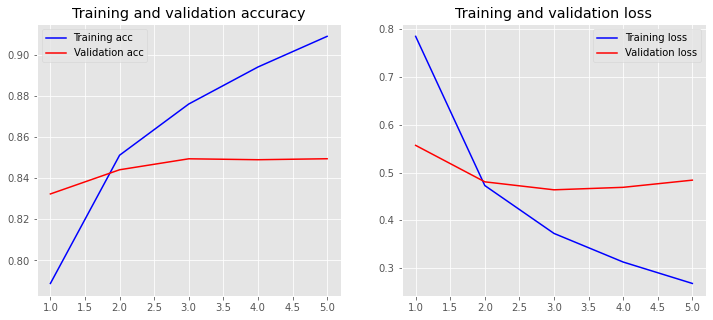

In [95]:
plot_history(history)

In [128]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [129]:
stop_words = set(stopwords.words('english'))
stemer = PorterStemmer()

def remove_SW_Stem(text):
    text=[stemer.stem(words) for words in text.split(" ") if words not in stop_words]
    return " ".join(text)

special_chars = re.compile('[^-9a-z#+_]')
add_space = re.compile('[/(){}\[\]\\@;]')

def clean_text(text):
    text=text.lower()
    text = add_space.sub(" ",text)
    text = special_chars.sub(" ",text)
    text = remove_SW_Stem(text)
    return text

In [130]:
df['narrative'] = df['narrative'].apply(lambda text:clean_text(text))

In [131]:
df

,narrative,Product,word_count
1,transworld system inc tri collect debt mine ...,Debt collection,18
3,past week receiv excess amount telephon cal...,Debt collection,78
6,pioneer commit sever feder violat privat law ...,Debt collection,152
8,previous xx xx xxxx xx xx xxxx xx xx xxxx r...,"Credit or consumer reporting, credit repair se...",171
9,hello complaint three credit report compani x...,"Credit or consumer reporting, credit repair se...",428
...,...,...,...
1823676,mail address incorrect date birth i...,Personal loan,19
1823677,made purchas xxxx xxxx use dis...,Credit card or prepaid card,44
1823680,xxxx xxxx contact xxxx xxxx branch man...,Mortgage,331
1823681,get chase servic mortgag own origin loan doc ...,Mortgage,21


In [134]:
df['narrative'][1748416]

'credit bureau investig disput xxxxxxxx xxxx xxxx account number xxxx  would known never payment made xx xx xxxx-xx xx xxxx  could verif never payment made account  updat credit report show   last payment   xx xx xxxx    payment histori show account current xx xx xxxx  account charg xx xx xxxx  significantli affect credit score process purchas first home  delet immedi  forc file lawsuit  purchas hous affect inaccuraci  file lawsuit immedi '

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


In [135]:
before_vect = df[['narrative']]
columnTransformer = ColumnTransformer( [('tfidf',TfidfVectorizer(stop_words=None, max_features=100000),'narrative')],
remainder='drop')
vector_transformer = columnTransformer.fit(before_vect)
vectorized_df = vector_transformer.transform(before_vect)

In [79]:
vectorized_df

<592935x99272 sparse matrix of type '<class 'numpy.float64'>'
	with 32223236 stored elements in Compressed Sparse Row format>

In [137]:
targetTransformer = ColumnTransformer( [('E',OneHotEncoder(dtype='int'))])

In [144]:
y=df['Product'].to_frame()

In [42]:
y

,Product
0,"Credit reporting, credit repair services, or o..."
1,Debt collection
2,"Credit reporting, credit repair services, or o..."
3,Debt collection
4,"Credit reporting, credit repair services, or o..."
...,...
1823678,Bank account or service
1823679,Credit reporting
1823680,Mortgage
1823681,Mortgage


In [141]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [142]:
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(vectorized_df, y)
X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.7989275484092732
                                                      precision    recall  f1-score   support

                         Checking or savings account       0.78      0.82      0.80     72885
                         Credit card or prepaid card       0.78      0.82      0.80     73008
Credit or consumer reporting, credit repair services       0.76      0.76      0.76     72446
                                     Debt collection       0.75      0.79      0.77     72432
         Money transfer or service, virtual currency       0.85      0.84      0.84     73035
                                            Mortgage       0.89      0.95      0.92     72579
                                       Personal loan       0.81      0.42      0.56     72688
                                        Student loan       0.91      0.93      0.92     72801
                               Vehicle loan or lease       0.69      0.85      0.76     72701

                              

In [139]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [140]:
smote = SMOTE(random_state=777,k_neighbors=18)
X_smote,y_smote = smote.fit_sample(vectorized_df,y)
X_train, x_test, Y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

C:\Users\virah\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy 0.8304777909330482
                                                      precision    recall  f1-score   support

                         Checking or savings account       0.83      0.86      0.84     72885
                         Credit card or prepaid card       0.82      0.86      0.84     73008
Credit or consumer reporting, credit repair services       0.78      0.76      0.77     72446
                                     Debt collection       0.79      0.82      0.80     72432
         Money transfer or service, virtual currency       0.88      0.88      0.88     73035
                                            Mortgage       0.92      0.96      0.94     72579
                                       Personal loan       0.84      0.50      0.62     72688
                                        Student loan       0.94      0.95      0.94     72801
                               Vehicle loan or lease       0.71      0.89      0.79     72701

                              